<a href="https://colab.research.google.com/github/SchneiderSix/Machine-Learning---Zoomcamp/blob/main/deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install packages

In [1]:
!pip install scikit-learn xgboost  tensorflow

Imports

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import tensorflow as tf
from tensorflow import keras

Get images

In [6]:
!unzip -q clothing-train -d /content/datasets/

In [7]:
from tensorflow.keras.preprocessing.image import load_img

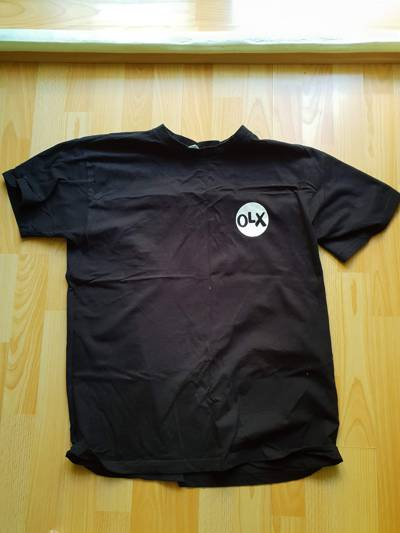

In [8]:
path = '/content/datasets/clothing-train/t-shirt'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

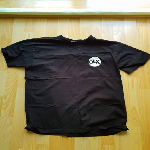

In [9]:
load_img(fullname, target_size=(150, 150))

In [10]:
img = load_img(fullname, target_size=(299, 299))
print(img)

<PIL.Image.Image image mode=RGB size=299x299 at 0x7F55DB6C1F60>


In [11]:
x = np.array(img)
x.shape

(299, 299, 3)

array([[[179, 171,  99],
        [179, 171,  99],
        [181, 173, 101],
        ...,
        [251, 253, 248],
        [251, 253, 248],
        [251, 254, 247]],

       [[188, 179, 112],
        [187, 178, 111],
        [186, 177, 108],
        ...,
        [251, 252, 247],
        [251, 252, 247],
        [251, 252, 246]],

       [[199, 189, 127],
        [200, 190, 128],
        [200, 191, 126],
        ...,
        [250, 251, 245],
        [250, 251, 245],
        [250, 251, 245]],

       ...,

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [183, 135,  25],
        [181, 133,  22],
        [183, 135,  24]],

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [182, 134,  23],
        [180, 132,  21],
        [182, 134,  23]],

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [181, 133,  22],
        [179, 131,  20],
        [182, 134,  23]]], dtype=uint8)
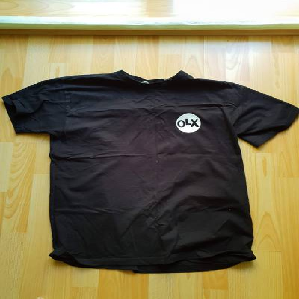

In [12]:
x

Pre-trained convolutional neural networks

Current Keras pre-trained models: https://keras.io/api/applications/

In [13]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [14]:
model = Xception(
    weights='imagenet',
    input_shape=(299, 299, 3)
)

91884032/91884032 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [15]:
X = np.array([x])

In [16]:
X = preprocess_input(X)

In [19]:
pred = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


In [18]:
decode_predictions(pred)

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step


[[('n03595614', 'jersey', 0.68196356),
  ('n02916936', 'bulletproof_vest', 0.038139995),
  ('n04370456', 'sweatshirt', 0.034324735),
  ('n03710637', 'maillot', 0.011354207),
  ('n04525038', 'velvet', 0.0018453562)]]

\begin{align}
\text{CNN} \\
\begin{bmatrix}
\text{layer 1} & → & \text{layer 2} & → \dots & → \text{layer N}
\end{bmatrix}\\
\text{}
\end{align}
Each layer has different weights, the item to be classified will be used to create a vector representation and then create dense layers because the item will be compared with each layer with it's specific weights (softmax)
\begin{align}
x
\end{align}
https://cs231n.github.io/

Transfer learning

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [32]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input
    )

In [33]:
train_ds = train_gen.flow_from_directory(
    '/content/datasets/clothing-train',
    target_size=(150, 150),
    batch_size=32,
    #class_mode='binary',
    #shuffle=True
)

Found 3068 images belonging to 10 classes.


In [34]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [35]:
X, y = next(train_ds)

Multiclass classification

In [36]:
y[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [37]:
val_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input
    )

val_ds = val_gen.flow_from_directory(
    '/content/datasets/clothing-train',
    target_size=(150, 150),
    batch_size=32,
    #class_mode='binary',
    shuffle=False
)

Found 3068 images belonging to 10 classes.


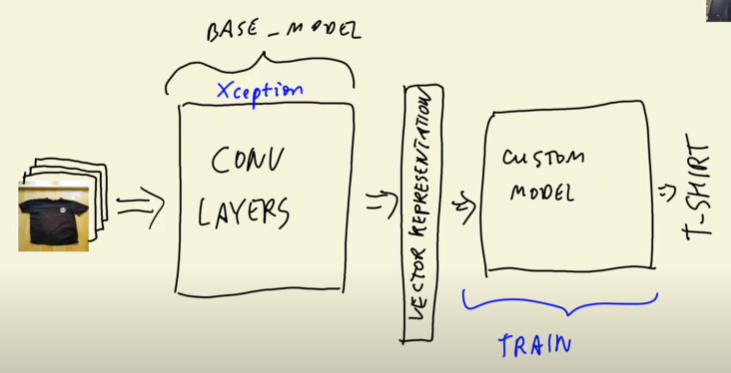

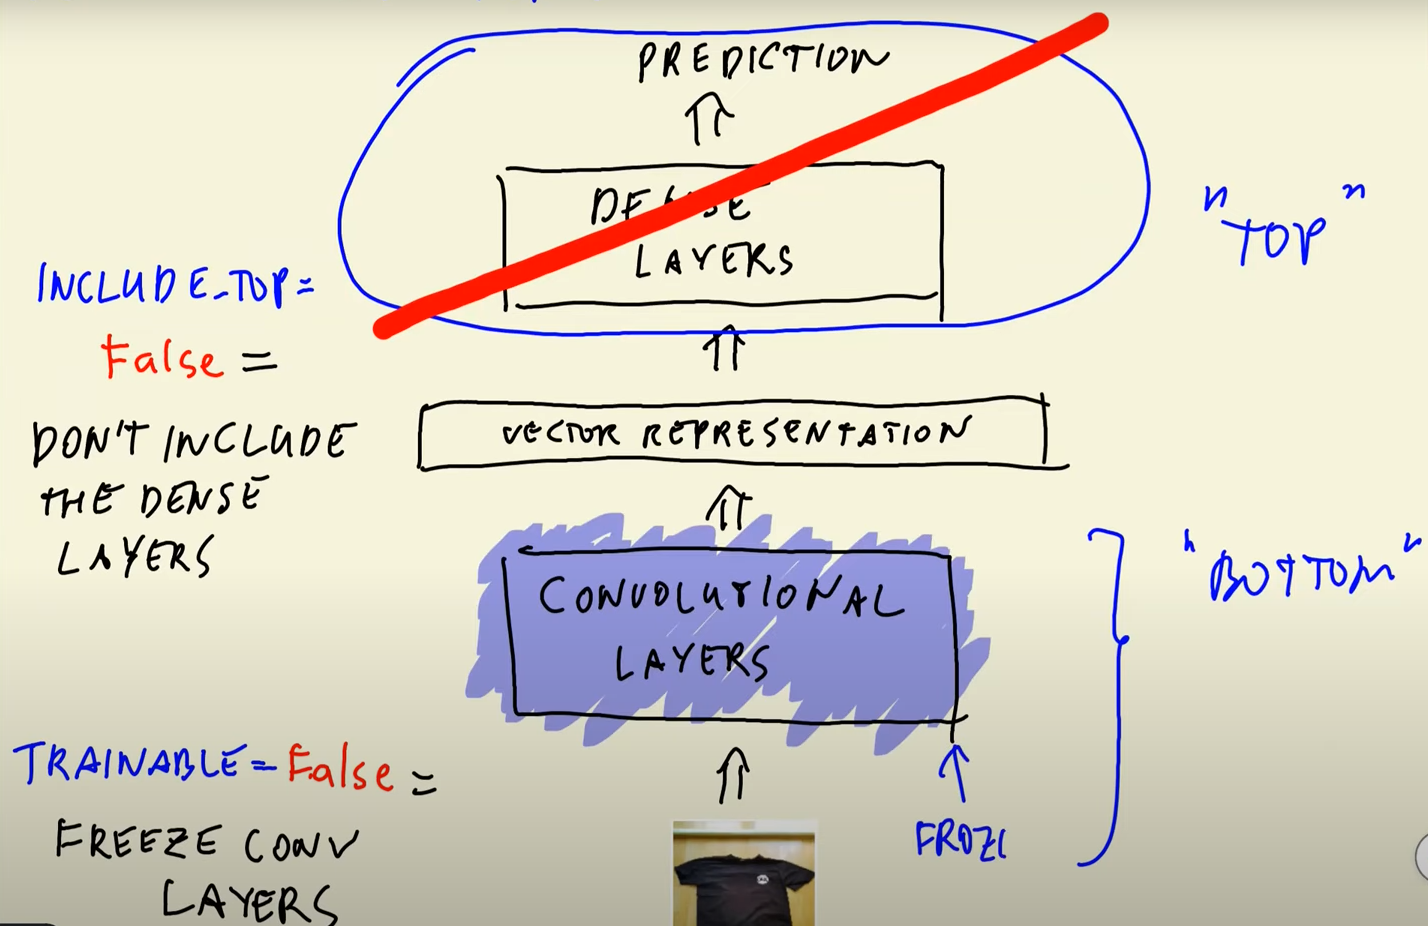

In [54]:
base_model = Xception(
    weights = 'imagenet',
    include_top = False, # don't include dense layers
    input_shape = (150, 150, 3)
)

# don't change convulutional layers
base_model.trainable = False

In [55]:
inputs = keras.Input(
    shape=(150,150,3)
)

# vector representation
base = base_model(inputs, training=False)

# transform preds vector to a 1D Vector doing average pooling
vectors = keras.layers.GlobalAveragePooling2D()(base)

# ten classes
outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)

In [47]:
#peds=outputs, X=inputs
preds = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [48]:
preds.shape

(32, 10)

In [56]:
# adaptative algorithm for learning rate
optimizer = keras.optimizers.Adam(
    learning_rate=0.01
)

# binary classification, in regression problem we would use MeanSquaredError
loss = keras.losses.CategoricalCrossentropy(
     from_logits = True
 )

In [57]:
model.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=['accuracy']
)

In [58]:
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds
)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 27s 216ms/step - accuracy: 0.5634 - loss: 1.7694 - val_accuracy: 0.8478 - val_loss: 0.4410
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 15s 147ms/step - accuracy: 0.8288 - loss: 0.5166 - val_accuracy: 0.8804 - val_loss: 0.3405
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 14s 146ms/step - accuracy: 0.8822 - loss: 0.3084 - val_accuracy: 0.8892 - val_loss: 0.3144
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 24s 179ms/step - accuracy: 0.9094 - loss: 0.3001 - val_accuracy: 0.9459 - val_loss: 0.1578
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 15s 149ms/step - accuracy: 0.9467 - loss: 0.1475 - val_accuracy: 0.9364 - val_loss: 0.1806
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 15s 150ms/step - accuracy: 0.9543 - loss: 0.1284 - val_accuracy: 0.9736 - val_loss: 0.0771
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 19s 189ms/step - accuracy: 0.9809 - loss: 0.0695 - val_accuracy: 0.9876 - val_loss: 0.0467
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 15s 151ms/step - accuracy: 0.9853 - loss: 0.0489 - val_accu

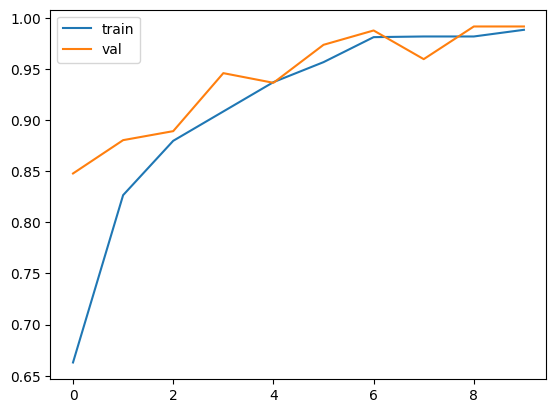

In [61]:
plt.plot(
    history.history['accuracy'],
    label='train'
)

plt.plot(
    history.history['val_accuracy'],
    label='val'
)

plt.legend()

Parmeter tuning

$\bullet$learning rate

In [62]:
def create_model(learning_rate=0.01):
  base_model = Xception(
      weights = 'imagenet',
      include_top = False, # don't include dense layers
      input_shape = (150, 150, 3)
  )

  # don't change convulutional layers
  base_model.trainable = False

  inputs = keras.Input(
      shape=(150,150,3)
  )

  # vector representation
  base = base_model(inputs, training=False)

  # transform preds vector to a 1D Vector doing average pooling
  vectors = keras.layers.GlobalAveragePooling2D()(base)

  # ten classes
  outputs = keras.layers.Dense(10)(vectors)

  model = keras.Model(inputs, outputs)

  # adaptative algorithm for learning rate
  optimizer = keras.optimizers.Adam(
      learning_rate=0.01
  )

  # binary classification, in regression problem we would use MeanSquaredError
  loss = keras.losses.CategoricalCrossentropy(
      from_logits = True
  )

  model.compile(
      optimizer=optimizer,
      loss=loss,
      metrics=['accuracy']
  )

  return model

In [63]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
  print(lr)
  model = create_model(lr)
  history = model.fit(
      train_ds,
      epochs=10,
      validation_data=val_ds
  )
  scores[lr] = history.history
  print('##########')

0.0001
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 29s 210ms/step - accuracy: 0.6023 - loss: 1.5416 - val_accuracy: 0.8523 - val_loss: 0.4387
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 34s 179ms/step - accuracy: 0.8472 - loss: 0.4807 - val_accuracy: 0.8941 - val_loss: 0.3010
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 160ms/step - accuracy: 0.8590 - loss: 0.4530 - val_accuracy: 0.9159 - val_loss: 0.2352
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 15s 152ms/step - accuracy: 0.9077 - loss: 0.2476 - val_accuracy: 0.9358 - val_loss: 0.1779
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 15s 151ms/step - accuracy: 0.9460 - loss: 0.1471 - val_accuracy: 0.9723 - val_loss: 0.0890
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 15s 154ms/step - accuracy: 0.9603 - loss: 0.1172 - val_accuracy: 0.9746 - val_loss: 0.0718
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 20s 152ms/step - accuracy: 0.9719 - loss: 0.0882 - val_accuracy: 0.9593 - val_loss: 0.1177
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 16s 162ms/step - accuracy: 0.9623 - loss: 0.1236 - v

In [64]:
for lr, hist in scores.items():
  print(lr)
  print(hist)


0.0001
{'accuracy': [0.6779661178588867, 0.8308344483375549, 0.8598435521125793, 0.9142764210700989, 0.9397001266479492, 0.9589309096336365, 0.9566493034362793, 0.9667536020278931, 0.9885919094085693, 0.9947848916053772], 'loss': [1.2381212711334229, 0.5389590859413147, 0.4257490634918213, 0.2426014244556427, 0.16083073616027832, 0.11708910018205643, 0.13031136989593506, 0.09446674585342407, 0.04109428822994232, 0.030863482505083084], 'val_accuracy': [0.8523467779159546, 0.8940678238868713, 0.9159061312675476, 0.9357888102531433, 0.9722946286201477, 0.9745762944221497, 0.9592568278312683, 0.991525411605835, 0.9964146018028259, 0.984028697013855], 'val_loss': [0.43873968720436096, 0.3009674847126007, 0.23517978191375732, 0.177898108959198, 0.0890292227268219, 0.07181339710950851, 0.11767014116048813, 0.03385870158672333, 0.023998931050300598, 0.047943875193595886]}
0.001
{'accuracy': [0.671447217464447, 0.8279008865356445, 0.8855932354927063, 0.9051499366760254, 0.9377444386482239, 0.95

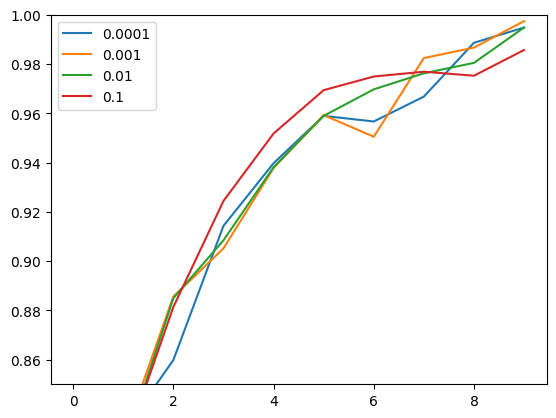

In [71]:
for lr, hist in scores.items():
  plt.plot(
      hist['accuracy'],
      label=lr
  )

plt.ylim(0.85, 1)
plt.legend()

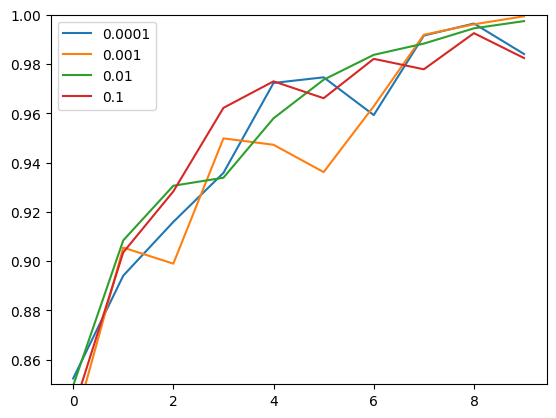

In [72]:
for lr, hist in scores.items():
  plt.plot(
      hist['val_accuracy'],
      label=lr
  )

plt.ylim(0.85, 1)
plt.legend()

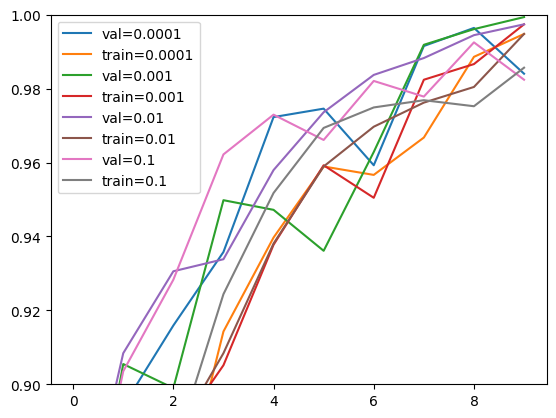

In [74]:
for lr, hist in scores.items():
  plt.plot(
      hist['val_accuracy'],
      label=('val=%s' % lr),
  )
  plt.plot(
      hist['accuracy'],
      label=('train=%s' % lr)
  )

plt.ylim(0.90, 1)
plt.legend()

In [75]:
learning_rate = 0.001

Checkpointing

Evaluate on each epoch

In [78]:
model.save_weights(
    'model_v1.weights.h5'
)

In [80]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.keras',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'#max monitor variable
)

In [81]:
learning_rate = 0.001

model = create_model(learning_rate)

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[checkpoint]
)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 25s 195ms/step - accuracy: 0.5910 - loss: 1.6173 - val_accuracy: 0.8377 - val_loss: 0.5432
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 15s 149ms/step - accuracy: 0.8338 - loss: 0.5550 - val_accuracy: 0.8752 - val_loss: 0.3571
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 14s 146ms/step - accuracy: 0.8866 - loss: 0.3239 - val_accuracy: 0.9322 - val_loss: 0.1942
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 18s 183ms/step - accuracy: 0.9270 - loss: 0.1881 - val_accuracy: 0.8967 - val_loss: 0.2886
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 14s 145ms/step - accuracy: 0.9244 - loss: 0.2163 - val_accuracy: 0.9668 - val_loss: 0.0955
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 18s 182ms/step - accuracy: 0.9741 - loss: 0.0829 - val_accuracy: 0.9762 - val_loss: 0.0878
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 15s 155ms/step - accuracy: 0.9825 - loss: 0.0597 - val_accuracy: 0.9915 - val_loss: 0.0383
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 19s 190ms/step - accuracy: 0.9815 - loss: 0.0524 - val_accu

In epoch 8 the model has the best score

Adding more inner dense layers

In [82]:
def create_model(learning_rate=0.01, size_inner=100):
  base_model = Xception(
      weights = 'imagenet',
      include_top = False, # don't include dense layers
      input_shape = (150, 150, 3)
  )

  # don't change convulutional layers
  base_model.trainable = False

  inputs = keras.Input(
      shape=(150,150,3)
  )

  # vector representation
  base = base_model(inputs, training=False)

  # transform preds vector to a 1D Vector doing average pooling
  vectors = keras.layers.GlobalAveragePooling2D()(base)

  # adding inner layer
  inner = keras.layers.Dense(size_inner, activation='relu')(vectors)

  # ten classes
  outputs = keras.layers.Dense(10)(inner)

  model = keras.Model(inputs, outputs)

  # adaptative algorithm for learning rate
  optimizer = keras.optimizers.Adam(
      learning_rate=0.01
  )

  # binary classification, in regression problem we would use MeanSquaredError
  loss = keras.losses.CategoricalCrossentropy(
      from_logits = True
  )

  model.compile(
      optimizer=optimizer,
      loss=loss,
      metrics=['accuracy']
  )

  return model

In [84]:
learning_rate = 0.001

scores = {}

for size in [10, 100, 1000]:
  print(size)
  model = create_model(learning_rate, size_inner=size)
  history = model.fit(
      train_ds,
      epochs=10,
      validation_data=val_ds
  )
  scores[size] = history.history
  print('##########')

10
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 26s 210ms/step - accuracy: 0.4037 - loss: 1.6877 - val_accuracy: 0.5469 - val_loss: 1.2637
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 33s 143ms/step - accuracy: 0.5964 - loss: 1.1218 - val_accuracy: 0.6679 - val_loss: 0.8516
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 14s 138ms/step - accuracy: 0.6823 - loss: 0.8455 - val_accuracy: 0.7158 - val_loss: 0.7099
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 14s 140ms/step - accuracy: 0.7206 - loss: 0.7099 - val_accuracy: 0.7953 - val_loss: 0.5621
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 14s 138ms/step - accuracy: 0.7921 - loss: 0.5689 - val_accuracy: 0.7761 - val_loss: 0.5837
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 21s 141ms/step - accuracy: 0.7990 - loss: 0.5272 - val_accuracy: 0.8315 - val_loss: 0.4730
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 14s 141ms/step - accuracy: 0.8504 - loss: 0.4297 - val_accuracy: 0.8680 - val_loss: 0.3736
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 21s 142ms/step - accuracy: 0.8586 - loss: 0.4073 - val_a

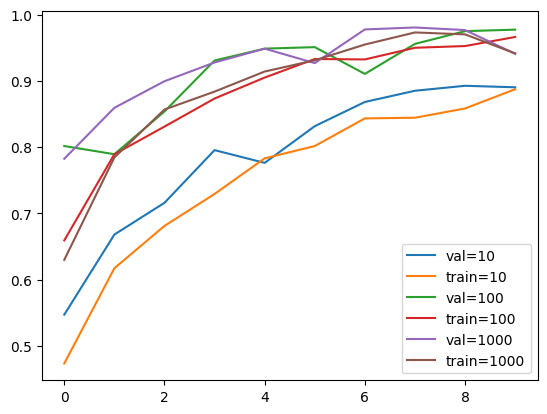

In [88]:
for size, hist in scores.items():
  plt.plot(
      hist['val_accuracy'],
      label=('val=%s' % size),
  )
  plt.plot(
      hist['accuracy'],
      label=('train=%s' % size)
  )

  plt.legend()